In [6]:
# import libraries
from copy import deepcopy
from sklearn import decomposition
from sklearn import datasets
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets
from sklearn.cluster import KMeans

# importing CSV and clean data
filepath = '../../../3ormoreDATLOW.csv'
dataMatrix = pd.read_csv(filepath, index_col=0)
dataMatrix.loc[dataMatrix['class'] == 2.0, 'class'] = -1.0


arr = dataMatrix.values
numcols = len(arr[0]) - 1
#NOTE!! THIS MAKES IT SO WE ONLY SEE CIMP-HIGH
colheads = list(dataMatrix.index)
collabs = []
for x in range(0, len(arr)):
    if(arr[x][len(arr[0])-1] == 1.0):
        collabs.append(colheads[x])
print(collabs)
new = arr[(arr[:,numcols]==1.)]
arr = new
print("len: ",len(arr))


x = arr[:,0:numcols]
y = arr[:,numcols]
for m in range(len(y)):
    if y[m] == -1:
        y[m] = 0

# Create a regular PCA model 
pca = decomposition.PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(x)

# Inspect the shape
reduced_data_pca.shape

# Print out the data
print(len(reduced_data_pca))
print(reduced_data_pca)

dataMatrix

['TCGA-A6-2672', 'TCGA-A6-2676', 'TCGA-AA-3516', 'TCGA-AA-3518', 'TCGA-AA-3525', 'TCGA-AA-3543', 'TCGA-AA-3664', 'TCGA-AA-3672', 'TCGA-AA-3710', 'TCGA-AA-3715', 'TCGA-AA-3821', 'TCGA-AA-3833', 'TCGA-AA-3837', 'TCGA-AA-3845', 'TCGA-AA-3870', 'TCGA-AA-3877', 'TCGA-AA-3941', 'TCGA-AA-3947', 'TCGA-AA-3949', 'TCGA-AA-3994', 'TCGA-AA-A00A', 'TCGA-AA-A00D', 'TCGA-AA-A00E', 'TCGA-AA-A00J', 'TCGA-AA-A01P', 'TCGA-AA-A022', 'TCGA-AA-A029', 'TCGA-AA-A02O', 'TCGA-AA-A03F', 'TCGA-AG-3575', 'TCGA-AG-3600', 'TCGA-AG-A02X']
len:  32
32
[[-0.52672581 -0.28652636]
 [ 0.35466779  0.25024564]
 [-0.02983436 -0.48149444]
 [-0.08025398 -0.11686258]
 [ 0.28242278 -0.85528531]
 [-0.32392555 -0.55263164]
 [-0.52672581 -0.28652636]
 [ 0.68664632  1.65360793]
 [ 0.25383879  1.44045178]
 [ 1.95937058  0.06619564]
 [ 0.39168079 -0.20378473]
 [ 0.77767452  0.80964407]
 [-0.86918112 -0.03267137]
 [ 0.39290385  0.0795739 ]
 [-0.982891   -0.04749782]
 [ 1.04711763  0.90941031]
 [-0.982891   -0.04749782]
 [ 2.24098331 -1

,BRAF_GRCh37_7:140453136-140453136_Missense-Mutation-SNP-A-A-T_Missense-Mutation-SNP-A-T-T,GRB14_GRCh37_2:165365288-165365296_In-Frame-Del-DEL-TTTTTTTTT----,MBD4_GRCh37_3:129155548-129155557_Frame-Shift-Del-DEL-TTTTTTTTTT----,MSH6_GRCh37_2:48030640-48030647_Frame-Shift-Del-DEL-CCCCCCCC----,PRDM2_GRCh37_1:14108749-14108757_In-Frame-Del-DEL-AAAAAAAAA----,HMMR_GRCh37_5:162917426-162917434_In-Frame-Del-DEL-AAAAAAAAA----,SEC63_GRCh37_6:108214755-108214764_Frame-Shift-Del-DEL-TTTTTTTTTT----,KRAS_GRCh37_12:25398284-25398284_Missense-Mutation-SNP-C-T-T,PIK3CA_GRCh37_3:178952085-178952085_Missense-Mutation-SNP-A-G-G,RAD50_GRCh37_5:131931452-131931460_In-Frame-Del-DEL-AAAAAAAAA----,ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----,CASP5_GRCh37_11:104878041-104878050_Frame-Shift-Del-DEL-TTTTTTTTTT----,MSH3_GRCh37_5:79970915-79970922_Frame-Shift-Del-DEL-AAAAAAAA----,ATR_GRCh37_3:142274740-142274749_Frame-Shift-Del-DEL-TTTTTTTTTT----,TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----,AIM2_GRCh37_1:159032487-159032496_Frame-Shift-Del-DEL-TTTTTTTTTT----,TCF7L2_GRCh37_10:114925317-114925325_In-Frame-Del-DEL-AAAAAAAAA----,class
TCGA-A6-2670,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0
TCGA-A6-2672,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
TCGA-A6-2674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0
TCGA-A6-2676,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1.0
TCGA-A6-2677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0
TCGA-A6-2678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0
TCGA-A6-2683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0
TCGA-A6-3807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0
TCGA-A6-3808,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,-1.0
TCGA-A6-3810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0


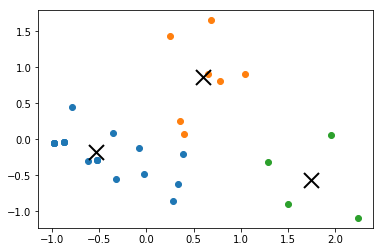

In [10]:
#calculate kmeans clustering
pts = []
for point in reduced_data_pca:
    pts.append([point[0],point[1]])
pts = np.array(pts)

# important: n_clusters, change to what you want
kmeans = KMeans(n_clusters=3, random_state=0).fit(pts)
#also change here
k = 3
kmeans.fit(pts)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
x = 0
for i in range(k):
    # select only data observations with cluster label == i
    ds = pts[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
    x += 1

# annotations. take off if too messy
'''for x in range(0,len(reduced_data_pca)):
    pyplot.annotate(collabs[x],(pts[x][0],pts[x][1]))'''

pyplot.show()